In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pf
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
fishies = pd.read_csv('../data/Fish.csv')
fishies.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
pf.ProfileReport(fishies)

In [4]:
import category_encoders as ce
binary_encoder = ce.BinaryEncoder(cols=['Species'])
encoded_fishies = binary_encoder.fit_transform(fishies)

In [5]:
encoded_fishies.drop('Species_0', axis=1, inplace=True)

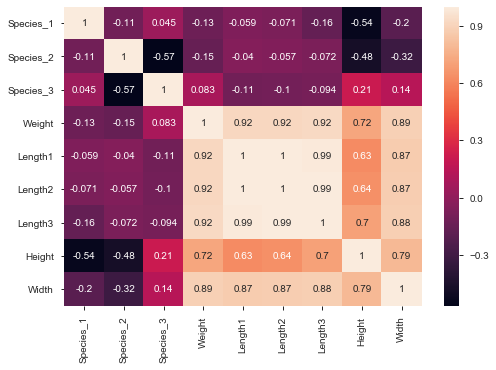

In [6]:
sns.heatmap(encoded_fishies.corr(), annot=True)

In [7]:
encoded_fishies.corr()

,Species_1,Species_2,Species_3,Weight,Length1,Length2,Length3,Height,Width
Species_1,1.000000,-0.111442,0.044652,-0.128778,-0.058825,-0.071240,-0.159636,-0.539543,-0.203916
Species_2,-0.111442,1.000000,-0.565428,-0.150796,-0.040389,-0.056714,-0.072456,-0.476446,-0.316627
Species_3,0.044652,-0.565428,1.000000,0.082835,-0.111546,-0.100731,-0.093989,0.214798,0.138473
Weight,-0.128778,-0.150796,0.082835,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.058825,-0.040389,-0.111546,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.071240,-0.056714,-0.100731,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.159636,-0.072456,-0.093989,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.539543,-0.476446,0.214798,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.203916,-0.316627,0.138473,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [8]:
encoded_fishies.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
encoded_fishies.head()

,Species_1,Species_2,Species_3,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,0,0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,0,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,0,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,0,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,0,1,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
train, test = train_test_split(encoded_fishies, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import RobustScaler

f_columns = ['LengthVer', 'LengthDia', 'LengthCro', 'Height']
f_transformer = RobustScaler()
weight_transformer = RobustScaler()

f_transformer = f_transformer.fit(encoded_fishies[f_columns].to_numpy())
weight_transformer = weight_transformer.fit(encoded_fishies[['Weight']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Weight'] = weight_transformer.transform(train[['Weight']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Weight'] = weight_transformer.transform(test[['Weight']])

In [11]:
x_train = train.drop('Weight', axis=1)
x_test = test.drop('Weight', axis=1)
y_train = train['Weight']
y_test = test['Weight']
y_test.head()

78    -0.367925
155   -0.489811
128   -0.137736
55    -0.005660
94    -0.232075
Name: Weight, dtype: float64

In [12]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
y_pred

array([-0.37943204, -0.59289475,  0.23883699,  0.2103171 , -0.2142297 ,
        1.09142609, -0.71220506, -0.11070594, -0.02158117,  1.62696831,
        0.62035577,  1.11271434,  0.62344408, -0.29558828,  0.78056586,
        1.06903272,  1.26811457,  0.09166042, -0.02250669,  0.60353764,
       -0.63378498,  0.67687833,  0.4382715 ,  0.45414577,  1.07469443,
        1.21375041, -0.11459771,  0.20975497, -0.74695818, -0.63936583,
        0.75432752, -0.49076847])

In [13]:
r2_sc = metrics.r2_score(y_test, y_pred)
r2_sc

0.9373269621914855

In [14]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

0.031735735855197025

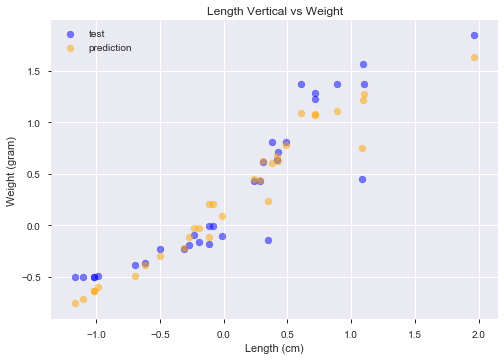

In [15]:
plt.scatter(x_test['LengthVer'], y_test, color='blue', alpha=0.5)
plt.scatter(x_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Length (cm)')
plt.ylabel('Weight (gram)')
plt.title('Length Vertical vs Weight')
plt.legend(['test', 'prediction'])
plt.show()

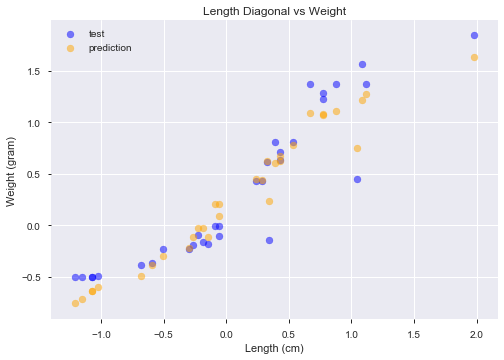

In [16]:
plt.scatter(x_test['LengthDia'], y_test, color='blue', alpha=0.5)
plt.scatter(x_test['LengthDia'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Length (cm)')
plt.ylabel('Weight (gram)')
plt.title('Length Diagonal vs Weight')
plt.legend(['test', 'prediction'])
plt.show()

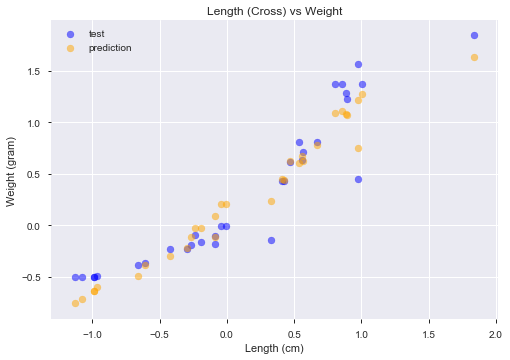

In [17]:
plt.scatter(x_test['LengthCro'], y_test, color='blue', alpha=0.5)
plt.scatter(x_test['LengthCro'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Length (cm)')
plt.ylabel('Weight (gram)')
plt.title('Length (Cross) vs Weight')
plt.legend(['test', 'prediction'])
plt.show()

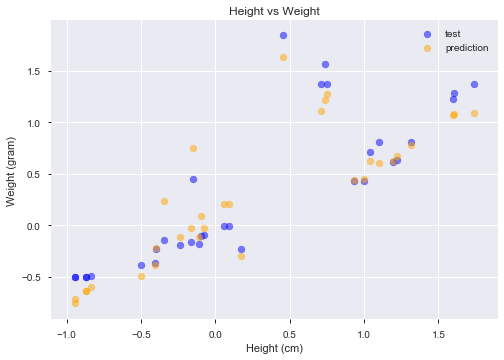

In [18]:
plt.scatter(x_test['Height'], y_test, color='blue', alpha=0.5)
plt.scatter(x_test['Height'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (gram)')
plt.title('Height vs Weight')
plt.legend(['test', 'prediction'])
plt.show()

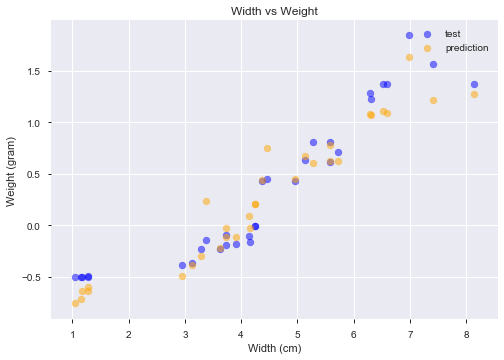

In [19]:
plt.scatter(x_test['Width'], y_test, color='blue', alpha=0.5)
plt.scatter(x_test['Width'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Width (cm)')
plt.ylabel('Weight (gram)')
plt.title('Width vs Weight')
plt.legend(['test', 'prediction'])
plt.show()

In [20]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
y_pred

array([-0.37530672, -0.5580364 ,  0.06502938,  0.20352114, -0.23696541,
        1.13717081, -0.65616269, -0.1529554 , -0.02487598,  1.30233929,
        0.63251728,  1.03411757,  0.66137161, -0.25080072,  0.77084552,
        1.05506735,  1.23758124,  0.0444716 , -0.04749329,  0.59741342,
       -0.58071555,  0.64652421,  0.37380137,  0.472844  ,  1.05680899,
        1.13587666, -0.13443635,  0.1942572 , -0.68178905, -0.59544199,
        0.47199365, -0.46493496])

In [21]:
r2_sc = metrics.r2_score(y_test, y_pred)
r2_sc

0.9349222046340373

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

0.03295343254435603

In [37]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
c_scores=[]
mse=[]

for c in C:
    svr = SVR(kernel='linear', C=c)
    svr.fit(x_train, y_train)
    y_pred = svr.predict(x_test)
    c_scores.append(metrics.r2_score(y_test, y_pred))
    mse.append(metrics.mean_squared_error(y_test, y_pred))

c_scores

[-0.1062827014720864,
 0.6161316444213405,
 0.8566696778533788,
 0.9116113655775042,
 0.9349222046340373,
 0.9364409153802398,
 0.9361393307666539]

In [38]:
tol = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
t_scores=[]
mse=[]

for t in tol:
    svr = SVR(kernel='linear', tol=t)
    svr.fit(x_train, y_train)
    y_pred = svr.predict(x_test)
    t_scores.append(metrics.r2_score(y_test, y_pred))
    mse.append(metrics.mean_squared_error(y_test, y_pred))

t_scores

[0.9347963924796352,
 0.9349222046340373,
 0.9357756312722021,
 0.9306948621802559,
 0.8568955679912522,
 -1.0200386582113041,
 -1.0200386582113041]

In [39]:
eps = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
e_scores=[]
mse=[]

for e in eps:
    svr = SVR(kernel='linear', epsilon=e)
    svr.fit(x_train, y_train)
    y_pred = svr.predict(x_test)
    e_scores.append(metrics.r2_score(y_test, y_pred))
    mse.append(metrics.mean_squared_error(y_test, y_pred))

e_scores

[0.9254868652460827,
 0.9258435358742665,
 0.9285374838240378,
 0.9349222046340373,
 0.3486499222581494,
 -1.0200386582113037,
 -1.0200386582113161]

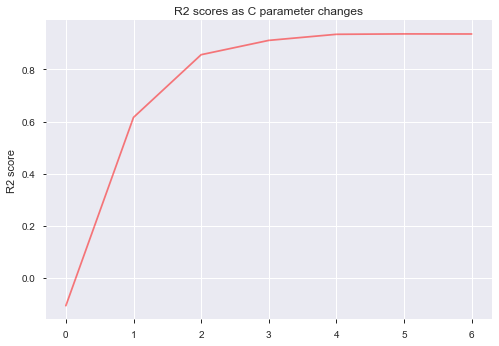

In [36]:
plt.plot(c_scores, color='red', alpha=0.5)
plt.ylabel('R2 score')
plt.title('R2 scores as C parameter changes')
plt.show()

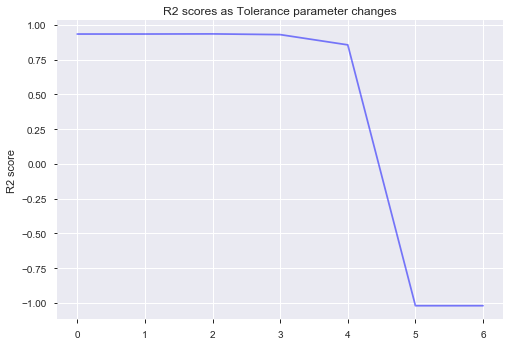

In [27]:
plt.plot(t_scores, color='blue', alpha=0.5)
plt.ylabel('R2 score')
plt.title('R2 scores as Tolerance parameter changes')
plt.show()

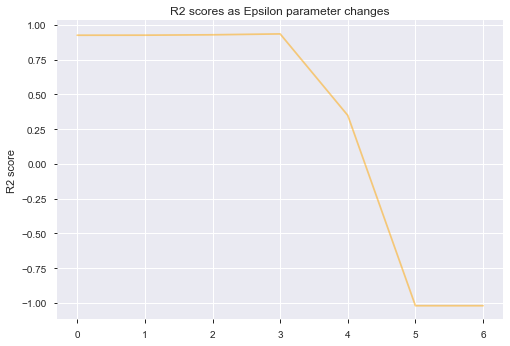

In [28]:
plt.plot(e_scores, color='orange', alpha=0.5)
plt.ylabel('R2 score')
plt.title('R2 scores as Epsilon parameter changes')
plt.show()

In [29]:
svr = SVR(kernel='linear', C=100)
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
r2

0.9361393307666539

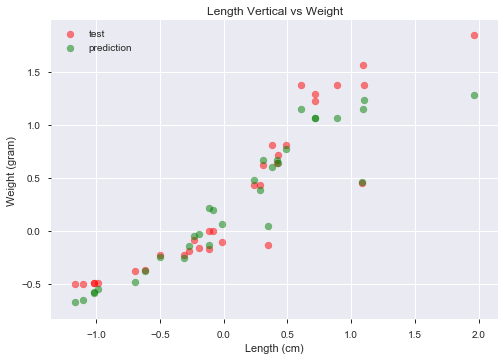

In [30]:
plt.scatter(x_test['LengthVer'], y_test, color='red', alpha=0.5)
plt.scatter(x_test['LengthVer'], y_pred, color='green', alpha=0.5)
plt.xlabel('Length (cm)')
plt.ylabel('Weight (gram)')
plt.title('Length Vertical vs Weight')
plt.legend(['test', 'prediction'])
plt.show()

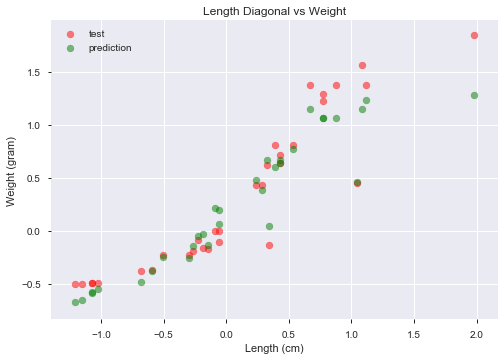

In [31]:
plt.scatter(x_test['LengthDia'], y_test, color='red', alpha=0.5)
plt.scatter(x_test['LengthDia'], y_pred, color='green', alpha=0.5)
plt.xlabel('Length (cm)')
plt.ylabel('Weight (gram)')
plt.title('Length Diagonal vs Weight')
plt.legend(['test', 'prediction'])
plt.show()

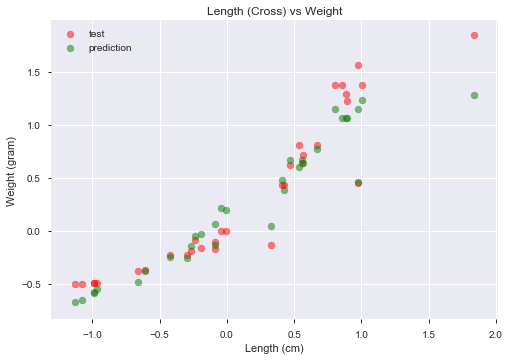

In [32]:
plt.scatter(x_test['LengthCro'], y_test, color='red', alpha=0.5)
plt.scatter(x_test['LengthCro'], y_pred, color='green', alpha=0.5)
plt.xlabel('Length (cm)')
plt.ylabel('Weight (gram)')
plt.title('Length (Cross) vs Weight')
plt.legend(['test', 'prediction'])
plt.show()

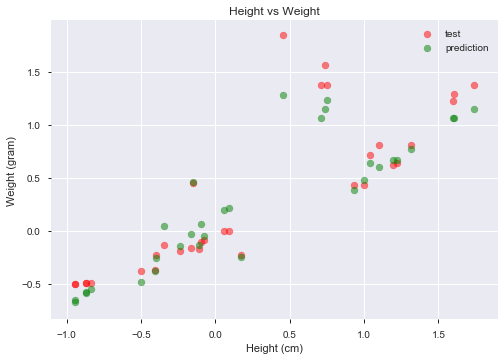

In [33]:
plt.scatter(x_test['Height'], y_test, color='red', alpha=0.5)
plt.scatter(x_test['Height'], y_pred, color='green', alpha=0.5)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (gram)')
plt.title('Height vs Weight')
plt.legend(['test', 'prediction'])
plt.show()

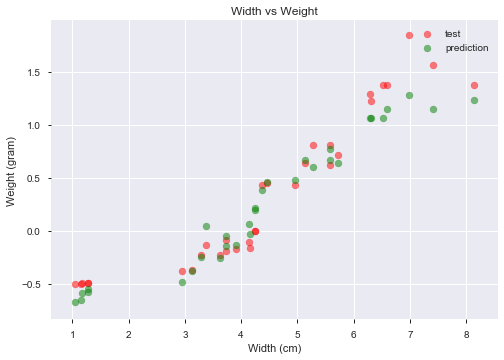

In [34]:
plt.scatter(x_test['Width'], y_test, color='red', alpha=0.5)
plt.scatter(x_test['Width'], y_pred, color='green', alpha=0.5)
plt.xlabel('Width (cm)')
plt.ylabel('Weight (gram)')
plt.title('Width vs Weight')
plt.legend(['test', 'prediction'])
plt.show()